<a href="https://colab.research.google.com/github/foreverchnf/2D-face-Caricature/blob/main/StyleGAN2_blending_Caricture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network blending in StyleGAN

Swapping layers between two models in StyleGAN gives some interesting results. You need a base model and a second model which has been fine-tuned from the base.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/stylegan2/generated/ ./


In [ ]:
!ls

sample_data  stylegan2


In [ ]:
!git clone https://github.com/justinpinkney/stylegan2.git
%cd stylegan2
!ls

Cloning into 'stylegan2'...
remote: Enumerating objects: 269, done.
remote: Total 269 (delta 0), reused 0 (delta 0), pack-reused 269
Receiving objects: 100% (269/269), 2.32 MiB | 42.42 MiB/s, done.
Resolving deltas: 100% (140/140), done.
/content/stylegan2
align_images.py  fake_art_portrait.jpg	 project_images.py  run_training.py
blend_models.py  ffhq_dataset		 projector.py	    test_nvcc.cu
dataset_tool.py  grid_vid.py		 README.md	    training
dnnlib		 LICENSE.txt		 run_generator.py
Dockerfile	 metrics		 run_metrics.py
docs		 pretrained_networks.py  run_projector.py


In [ ]:
%tensorflow_version 1.x
!pip install typer

TensorFlow 1.x selected.


In [ ]:
!unzip cartoon1.zip

Png转jpg


In [ ]:
import os
from PIL import Image

dirname_read="cartoon1/"   #注意后面的斜杠
dirname_write="cartoon1_jpg/"
names=os.listdir(dirname_read)
count=0
for name in names:
    img=Image.open(dirname_read+name)
    name=name.split(".")
    if name[-1] == "png":
        name[-1] = "jpg"
        name = str.join(".", name)
        r,g,b,a=img.split()              
        img=Image.merge("RGB",(r,g,b))   
        to_save_path = dirname_write + name
        img.save(to_save_path)
        count+=1
        print(to_save_path, "------conut：",count)
    else:
        continue


In [ ]:
%cd ..


/content/stylegan2


Command line help for the blending function is below. Make sure that you specify either `--output-grid` to save an example image or `--output-pkl` to save the modified pkl. (Currently only the the Gs network is modified)

- low_res_pkl: Path, # Pickle file from which to take low res layers
- high_res_pkl: Path, # Pickle file from which to take high res layers
- resolution: int, # Resolution level at which to switch between models
- level: int  = 0, # Switch at Conv block 0 or 1?
- blend_width: Optional[float] = None, # None = hard switch, float = smooth switch (logistic) with given width
- output_grid: Optional[Path] = "blended.jpg", # Path of image file to save example grid (None = don't save)
- seed: int = 0, # seed for random grid
- output_pkl: Optional[Path] = None, # Output path of pickle (None = don't save)
- verbose: bool = False, # Print out the exact blending fraction

         

In [ ]:
!python blend_models.py --help

Usage: blend_models.py [OPTIONS] LOW_RES_PKL
                       HIGH_RES_PKL RESOLUTION

Arguments:
  LOW_RES_PKL   [required]
  HIGH_RES_PKL  [required]
  RESOLUTION    [required]

Options:
  --level INTEGER                 [default: 0]
  --blend-width FLOAT
  --output-grid PATH              [default:
                                  blended.jpg]

  --seed INTEGER                  [default: 0]
  --output-pkl PATH
  --verbose / --no-verbose        [default: False]
  --install-completion [bash|zsh|fish|powershell|pwsh]
                                  Install
                                  completion for
                                  the specified
                                  shell.

  --show-completion [bash|zsh|fish|powershell|pwsh]
                                  Show completion
                                  for the
                                  specified shell,
                                  to copy it or
                                  customize the

Use as an example a model I fine-tuned at 256 from FFHQ to data scraped from NASA DSCOVR:EPIC satellite (https://epic.gsfc.nasa.gov/).

For the output of the fine-tuned model see the tweet below (https://twitter.com/Buntworthy/status/1295445259971899393)

I'm actually going to use a model from earlier in training than the result shown in the tweet, this makes the blending a bit nicer.

In [ ]:
 !gdown https://drive.google.com/uc?id=10Fu5XqzSGCF0y7jeL_iSW_HlGK3QRMmT
 !wget http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl

Downloading...
From: https://drive.google.com/uc?id=10Fu5XqzSGCF0y7jeL_iSW_HlGK3QRMmT
To: /content/stylegan2/network-final.pkl
349MB [00:03, 97.5MB/s]
--2020-12-18 07:56:56--  http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl
Resolving d36zk2xti64re0.cloudfront.net (d36zk2xti64re0.cloudfront.net)... 13.224.8.228, 13.224.8.42, 13.224.8.159, ...
Connecting to d36zk2xti64re0.cloudfront.net (d36zk2xti64re0.cloudfront.net)|13.224.8.228|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381673535 (364M) [application/x-www-form-urlencoded]
Saving to: ‘stylegan2-ffhq-config-f.pkl’

stylegan2-ffhq-conf 100%[===================>] 363.99M   271MB/s    in 1.3s    

2020-12-18 07:56:58 (271 MB/s) - ‘stylegan2-ffhq-config-f.pkl’ saved [381673535/381673535]



下载自己训练的模型到Runtime

In [ ]:
!gdown https://drive.google.com/uc?id=1ps8pU7WQaHnqN3LNBJ6GXHR0VyM_IO5a
!gdown https://drive.google.com/uc?id=1YkaCjhFJwJVhVdldUkc2Z0SW52N8hN68

Downloading...
From: https://drive.google.com/uc?id=1ps8pU7WQaHnqN3LNBJ6GXHR0VyM_IO5a
To: /content/stylegan2/network-snapshot-000168.pkl
296MB [00:01, 240MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YkaCjhFJwJVhVdldUkc2Z0SW52N8hN68
To: /content/stylegan2/network-snapshot-000529.pkl
382MB [00:03, 101MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1OP424RST6JKtREaJNM7b4rUcqHNxRgLd

Downloading...
From: https://drive.google.com/uc?id=1OP424RST6JKtREaJNM7b4rUcqHNxRgLd
To: /content/stylegan2/network-snapshot-001708.pkl
296MB [00:03, 93.1MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1dpZKsyZw7zj-1yy19fDRKDYwQ472BAwo

Downloading...
From: https://drive.google.com/uc?id=1dpZKsyZw7zj-1yy19fDRKDYwQ472BAwo
To: /content/stylegan2/Mery-ffhq-snapshot-001010.pkl
296MB [00:05, 50.1MB/s]


Time to try out a bunch of different resolutions for the switch and display the results. Remember the earth model provides the low-resolution layers, i.e. the "structure", and the original faces model the high-resolution, i.e. the "texture"

I'm going to run the main function in blend_models.py in a python loop, but you can also run it from the command line, something like

`python blend_models.py epic-slim-256-000040.pkl stylegan2-ffhq.pkl 64 --output-grid "blended.jpg"`

In [ ]:
!wget https://thisponydoesnotexist.net/model/network-ponies-1024-151552.pkl

--2020-12-18 07:57:28--  https://thisponydoesnotexist.net/model/network-ponies-1024-151552.pkl
Resolving thisponydoesnotexist.net (thisponydoesnotexist.net)... 172.67.145.125, 104.24.117.108, 104.24.116.108, ...
Connecting to thisponydoesnotexist.net (thisponydoesnotexist.net)|172.67.145.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381681462 (364M) [application/octet-stream]
Saving to: ‘network-ponies-1024-151552.pkl’

network-ponies-1024 100%[===================>] 364.00M  5.56MB/s    in 66s     

2020-12-18 07:58:35 (5.50 MB/s) - ‘network-ponies-1024-151552.pkl’ saved [381681462/381681462]



In [ ]:
!gdown https://drive.google.com/uc?id=1H-MYFZqngF1R0whm4bc3fEoX7VvOWaDl

Downloading...
From: https://drive.google.com/uc?id=1H-MYFZqngF1R0whm4bc3fEoX7VvOWaDl
To: /content/stylegan2/network-snapshot-metfaces2.pkl
382MB [00:04, 86.2MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1BUL-RIzXC7Bpnz2cn230CbA4eT7_Etp0

Downloading...
From: https://drive.google.com/uc?id=1BUL-RIzXC7Bpnz2cn230CbA4eT7_Etp0
To: /content/stylegan2/ffhq-256-config-e-003810.pkl
296MB [00:04, 70.4MB/s]


In [ ]:
from IPython.display import Image 

blending at 8x8


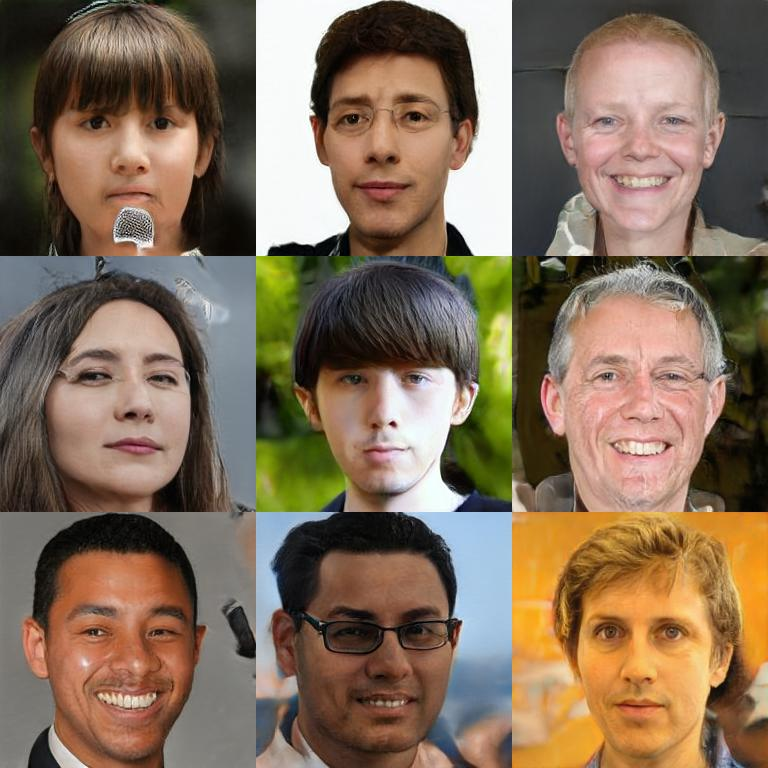

blending at 16x16


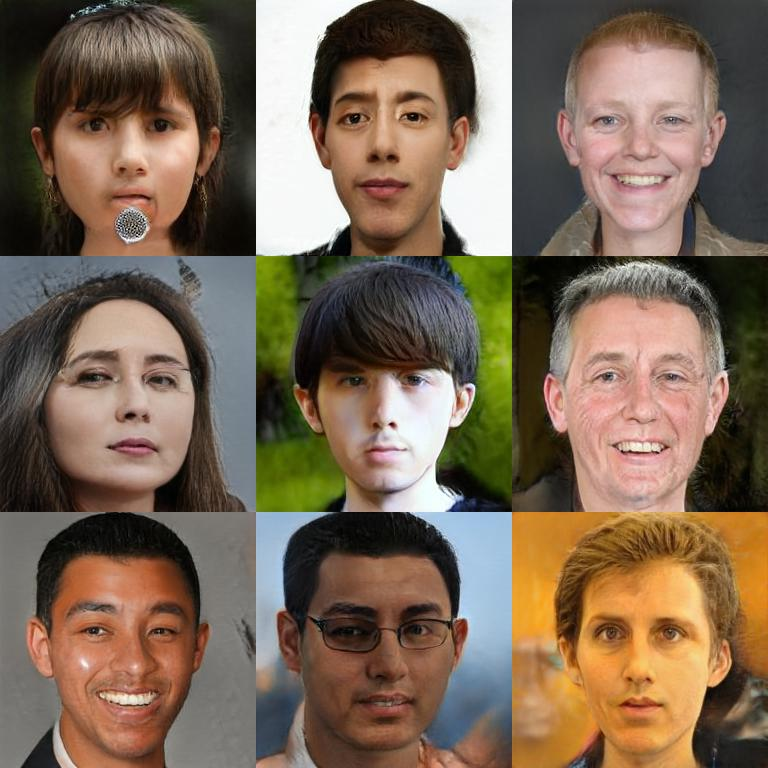

blending at 32x32


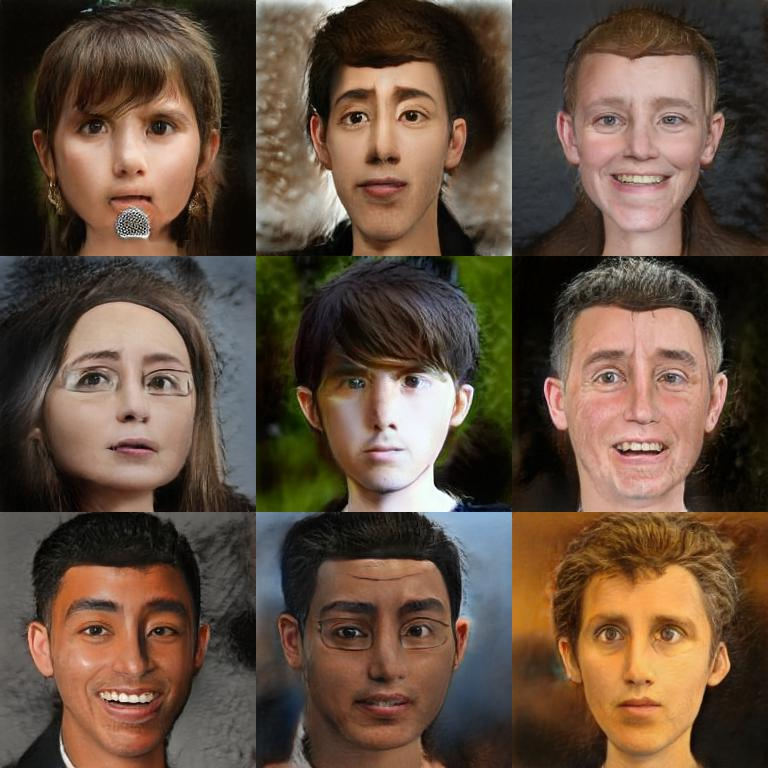

blending at 64x64


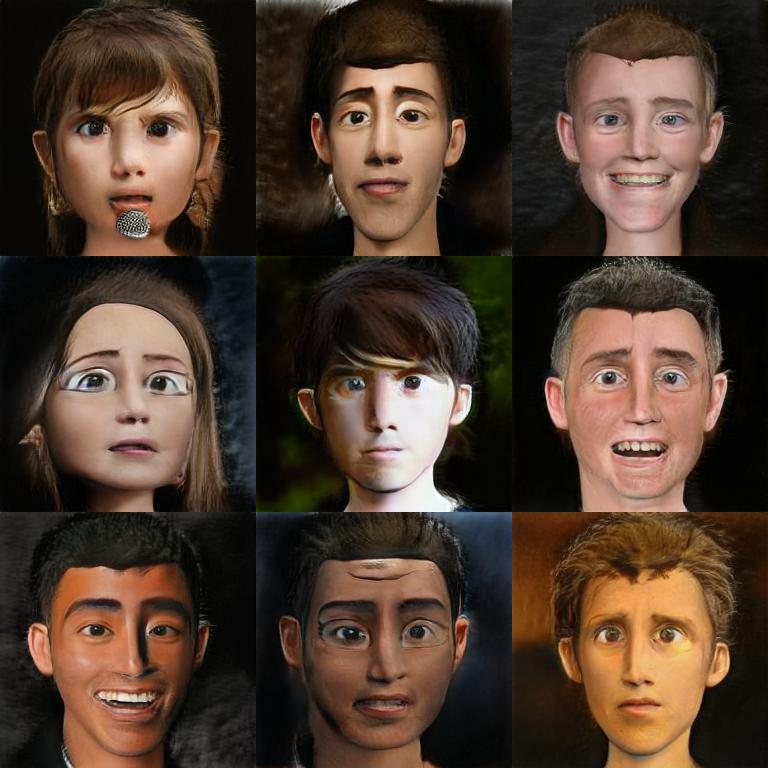

blending at 128x128


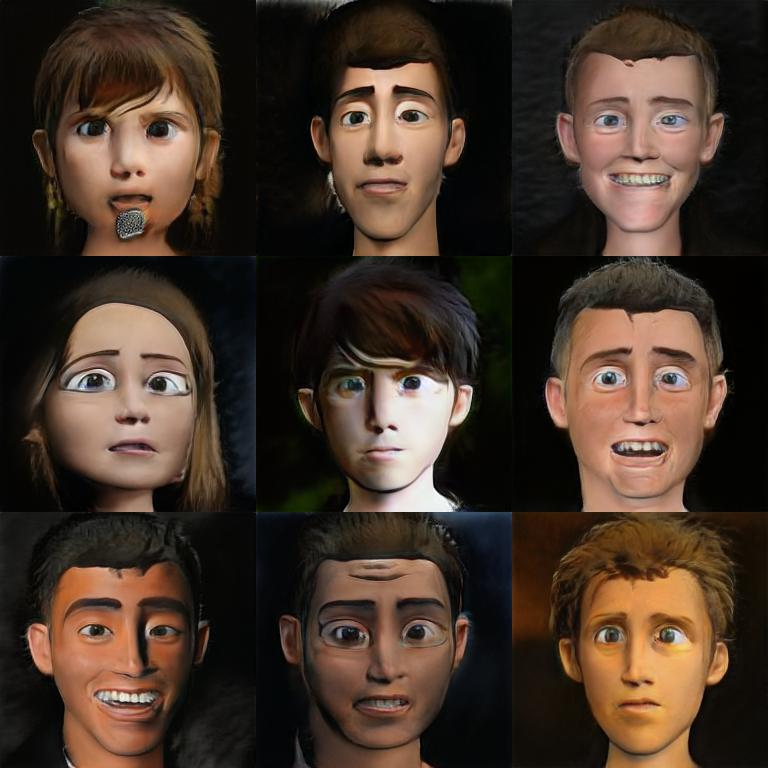

In [ ]:
import blend_models

resolutions = (8, 16, 32, 64, 128)
#resolutions = (256, 512)
for res in resolutions:
  filename = f"blended-{res}.jpg"
  blend_models.main("results/00002-stylegan2-cartoon1_256-1gpu-config-f/network-snapshot-000016.pkl", "ffhq-256-config-e-003810.pkl", res, output_grid=filename)
  #blend_models.main("stylegan2-ffhq-config-f.pkl", "yuanshen-2000k-network-final.pkl", res, output_grid=filename)
  img = Image(filename=filename)
  print(f"blending at {res}x{res}")
  display(img)

justin做的模型

In [ ]:
!gdown https://drive.google.com/uc?id=1H73TfV5gQ9ot7slSed_l-lim9X7pMRiU


Downloading...
From: https://drive.google.com/uc?id=1H73TfV5gQ9ot7slSed_l-lim9X7pMRiU
To: /content/stylegan2/ffhq-cartoon-blended-64.pkl
382MB [00:03, 107MB/s]


In [ ]:
!wget https://hanlab.mit.edu/projects/data-efficient-gans/models/stylegan2-ffhq.pkl
!gdown https://drive.google.com/uc?id=1-p0zIkWPXjcwYZ6tPw_kNjn4e1gD2lnz

--2020-12-17 08:42:09--  https://hanlab.mit.edu/projects/data-efficient-gans/models/stylegan2-ffhq.pkl
Resolving hanlab.mit.edu (hanlab.mit.edu)... 18.25.8.36
Connecting to hanlab.mit.edu (hanlab.mit.edu)|18.25.8.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 295721852 (282M)
Saving to: ‘stylegan2-ffhq.pkl’

stylegan2-ffhq.pkl  100%[===================>] 282.02M  39.9MB/s    in 7.5s    

2020-12-17 08:42:17 (37.5 MB/s) - ‘stylegan2-ffhq.pkl’ saved [295721852/295721852]

Downloading...
From: https://drive.google.com/uc?id=1-p0zIkWPXjcwYZ6tPw_kNjn4e1gD2lnz
To: /content/stylegan2/epic-slim-256-000040.pkl
296MB [00:02, 100MB/s]


数据集下载

In [ ]:
!gdown https://drive.google.com/uc?id=1zEgVLrKVp8oCZuX0NENcAeh-kdaKJzNG

Downloading...
From: https://drive.google.com/uc?id=1zEgVLrKVp8oCZuX0NENcAeh-kdaKJzNG
To: /content/stylegan2/ukiyoe-1024-v2.tar
1.23GB [00:05, 213MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1EJ-ld-2lQBFKk3_40aK4TEKQh_WGsmLn

Downloading...
From: https://drive.google.com/uc?id=1EJ-ld-2lQBFKk3_40aK4TEKQh_WGsmLn
To: /content/stylegan2/yuanshen.tar
100% 102k/102k [00:00<00:00, 44.8MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=182D6zoIEwrM4krpJnYdWpyfohF2K4M9V

Downloading...
From: https://drive.google.com/uc?id=182D6zoIEwrM4krpJnYdWpyfohF2K4M9V
To: /content/stylegan2/yuanshen_256.rar
100% 220k/220k [00:00<00:00, 7.07MB/s]


查看GPU

In [ ]:
import tensorflow as tf
print('Tensorflow version: {}'.format(tf.__version__) )
!nvidia-smi -L
print('GPU Identified at: {}'.format(tf.test.gpu_device_name()))

Tensorflow version: 1.15.2
GPU 0: Tesla P4 (UUID: GPU-08449e6c-605b-a2da-17db-64572c09d096)
GPU Identified at: /device:GPU:0


Create Dataset in tfrecord

In [ ]:
!tar -cvf yuanshen_256.tar yuanshen_256 

yuanshen_256/
yuanshen_256/keqing_256.jpg
yuanshen_256/babala_256.jpg
yuanshen_256/wendi_256.jpg
yuanshen_256/ningguang_256.jpg
yuanshen_256/xingqiu_256.jpg
yuanshen_256/xianglin_256.jpg
yuanshen_256/lisa_256.jpg
yuanshen_256/qin_256.jpg
yuanshen_256/nuoaier_256.jpg


In [ ]:
!tar -xf yuanshen_256.tar

In [ ]:
!python dataset_tool.py create_from_images_raw ./dataset/cartoon1_256 cartoon1_jpg

Loading images from "cartoon1_jpg"
detected 782 images ...
Shuffle the images...
Creating dataset "./dataset/cartoon1_256"
Adding the images to tfrecords ...
added images 0
Added 782 images.


256尺寸的模型

In [ ]:
!gdown https://drive.google.com/uc?id=1ZwwrDTHjvEJWorka2DNdEKUWXVmRVGRd

Downloading...
From: https://drive.google.com/uc?id=1ZwwrDTHjvEJWorka2DNdEKUWXVmRVGRd
To: /content/stylegan2/ffhq-256-config-f.pkl
357MB [00:07, 44.8MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1WnYMHbufo76sRqJtcVfsEHKGp8thmFXC

Downloading...
From: https://drive.google.com/uc?id=1WnYMHbufo76sRqJtcVfsEHKGp8thmFXC
To: /content/stylegan2/network-snapshot-000048.pkl
296MB [00:03, 86.4MB/s]


训练模型

In [ ]:
!python run_training.py --num-gpus=1 --data-dir=./dataset --config=config-f --dataset=cartoon1_256 --mirror-augment=true --resume-pkl=ffhq-256-config-e-003810.pkl --metric=none --total-kimg=200 --result-dir='results'

Local submit - run_dir: results/00002-stylegan2-cartoon1_256-1gpu-config-f
dnnlib: Running training.training_loop.training_loop() on localhost...
Streaming data using training.dataset.TFRecordDataset...
Dataset shape = [3, 256, 256]
Dynamic range = [0, 255]
Label size    = 0
Loading networks from "ffhq-256-config-e-003810.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.

G                             Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 0)              -               
lod                           -         ()                  -               
dlatent_avg                   -         (512,)              -               
G_mapping/latents_in          -         (

生成人脸

In [ ]:
!python run_generator.py generate-images --seeds=0-99 --truncation-psi=1 --network=ffhq-yuanshen-blended-64.pkl

In [ ]:
!python run_generator.py style-mixing-example --row-seeds=293,1789,821,55 --col-seeds=55,821,1789,293 --truncation-psi=1 --network=ffhq-cartoon-blended-64.pkl

Local submit - run_dir: results/00002-style-mixing-example
dnnlib: Running run_generator.style_mixing_example() on localhost...
Loading networks from "ffhq-cartoon-blended-64.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Generating W vectors...
Generating images...
2020-12-16 13:54:05.646618: W tensorflow/core/common_runtime/bfc_allocator.cc:305] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
Generating style-mixed images...
Saving images...
Saving image

融合模型

In [ ]:
!python blend_models.py network-snapshot-metfaces2.pkl stylegan2-ffhq-config-f.pkl 32 --output-pkl="ffhq-metfaces2-blended-32.pkl"

Traceback (most recent call last):
  File "blend_models.py", line 124, in <module>
    typer.run(main)
  File "/usr/local/lib/python3.6/dist-packages/typer/main.py", line 859, in run
    app()
  File "/usr/local/lib/python3.6/dist-packages/typer/main.py", line 214, in __call__
    return get_command(self)(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/click/core.py", line 829, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/click/core.py", line 782, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.6/dist-packages/click/core.py", line 1066, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.6/dist-packages/click/core.py", line 610, in invoke
    return callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/typer/main.py", line 497, in wrapper
    return callback(**use_params)  # type: ignore
  File "blend_models.py", line 107, in main
    low_res_G

In [ ]:
!python blend_models.py Mery-ffhq-snapshot-001010.pkl ffhq-256-config-e-003810.pkl 8 --output-pkl="ffhq-mery2-blended-8.pkl"
!python blend_models.py Mery-ffhq-snapshot-001010.pkl ffhq-256-config-e-003810.pkl 16 --output-pkl="ffhq-mery2-blended-16.pkl"
!python blend_models.py Mery-ffhq-snapshot-001010.pkl ffhq-256-config-e-003810.pkl 32 --output-pkl="ffhq-mery2-blended-32.pkl"
!python blend_models.py Mery-ffhq-snapshot-001010.pkl ffhq-256-config-e-003810.pkl 64 --output-pkl="ffhq-mery2-blended-64.pkl"


Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
2020-12-20 06:55:28.198188: W tensorflow/core/common_runtime/bfc_allocator.cc:305] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
2020-12-20 06:56:11.096234: W tensorflow/core/common_runtime/bfc_allocator.cc:305] Garbage collection: deallocate free memory 

In [ ]:
!python blend_models.py results/00002-stylegan2-cartoon1_256-1gpu-config-f/network-snapshot-000016.pkl ffhq-256-config-e-003810.pkl 32 --output-pkl="ffhq-cartoon1-blended-32.pkl"

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
2020-12-20 14:17:05.081440: W tensorflow/core/common_runtime/bfc_allocator.cc:305] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


In [ ]:
!cp results/00002-stylegan2-cartoon1_256-1gpu-config-f/network-snapshot-000020.pkl /content/drive/MyDrive/stylegan2/

对任意人脸按融合模型进行生成

In [ ]:
!cp -r /content/drive/MyDrive/stylegan2/raw raw

In [ ]:
!mkdir raw
!mkdir aligned
!mkdir generated

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/6/6d/Shinz%C5%8D_Abe_Official.jpg -O raw/example.jpg

--2020-12-20 14:18:41--  https://upload.wikimedia.org/wikipedia/commons/6/6d/Shinz%C5%8D_Abe_Official.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332712 (325K) [image/jpeg]
Saving to: ‘raw/example.jpg’

raw/example.jpg     100%[===================>] 324.91K  --.-KB/s    in 0.01s   

2020-12-20 14:18:41 (30.2 MB/s) - ‘raw/example.jpg’ saved [332712/332712]



在这里修改要用来生成新人脸的（融合）网络

In [ ]:
import pretrained_networks

# use my copy of the blended model to save Doron's download bandwidth
# get the original here https://mega.nz/folder/OtllzJwa#C947mCCdEfMCRTWnDcs4qw

#blended_url = "https://drive.google.com/uc?id=1-p0zIkWPXjcwYZ6tPw_kNjn4e1gD2lnz" 
ffhq_url = "http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl"

_, _, Gs_blended = pretrained_networks.load_networks('ffhq-cartoon1-blended-32.pkl')
_, _, Gs = pretrained_networks.load_networks('ffhq-256-config-e-003810.pkl')
#_, _, Gs = pretrained_networks.load_networks(ffhq_url)

可以在align_images.py中修改（添加）最后一行（39）里的参数output_size=256 修改此函数输出的对齐人脸照片的尺寸（256*256）

In [ ]:
!python align_images.py raw_223 aligned_223

--network-pkl参数可以指定用来project的网络（最好用和迁移学习时用的同一个网络），不加的话默认用官方的stylegan2-ffhq-config-f.pkl

In [ ]:
!python project_images.py --num-steps 500 --network-pkl=ffhq-256-config-e-003810.pkl aligned_223 generated_self

Loading networks from "ffhq-256-config-e-003810.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loading images from ".stylegan2-tmp/dataset/images"
detected 1 images ...
Creating dataset ".stylegan2-tmp/dataset/tfrecords"
Adding the images to tfrecords ...
added images 0
Added 1 images.
Projecting image "bianrong_1_01.png"...
0 / 500 ... 2020-12-20 15:24:30.177678: W tensorflow/core/common_runtime/bfc_allocator.cc:305] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this

In [ ]:
import numpy as np
from PIL import Image
import dnnlib
import dnnlib.tflib as tflib
from pathlib import Path

latent_dir = Path("generated_self")
latents = latent_dir.glob("*.npy")
for latent_file in latents:
  latent = np.load(latent_file)
  latent = np.expand_dims(latent,axis=0)
  synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=False), minibatch_size=8)
  images = Gs_blended.components.synthesis.run(latent, randomize_noise=False, **synthesis_kwargs)
  Image.fromarray(images.transpose((0,2,3,1))[0], 'RGB').save(latent_file.parent / (f"{latent_file.stem}-toon-32.jpg"))


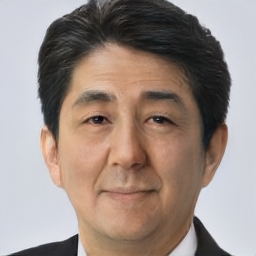

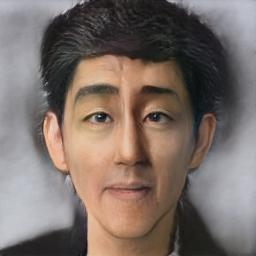

In [ ]:
from IPython.display import Image 
embedded = Image(filename="generated/example_01.png", width=256)
display(embedded)
tooned = Image(filename="generated/example_01-toon-32.jpg", width=256)
display(tooned)

将结果存至Google Drive

In [ ]:
!cp -r raw_self /content/drive/MyDrive/stylegan2
!cp -r aligned_self /content/drive/MyDrive/stylegan2
!cp -r generated_self /content/drive/MyDrive/stylegan2

In [ ]:
!cp -r raw_223 /content/drive/MyDrive/stylegan2
!cp -r aligned_223 /content/drive/MyDrive/stylegan2

In [ ]:
!cp ffhq-cartoon1-blended-32.pkl /content/drive/MyDrive/stylegan2

生成图片和视频

In [ ]:
# Download the model of choice
import argparse
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import re
import sys
from io import BytesIO
import IPython.display
import numpy as np
from math import ceil
from PIL import Image, ImageDraw
import imageio

import pretrained_networks

import hashlib 

from google_drive_downloader import GoogleDriveDownloader as gdd



In [ ]:
from IPython import display as ipythondisplay
import io
import os
import base64
from IPython.display import HTML

def show_video(vid):
  #mp4list = [video
  #if len(mp4list) > 0:
  ext = os.path.splitext(vid)[-1][1:]
  video = io.open(vid, 'r+b').read()
  #encoded = base64.b64encode(video)
  ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
              loop controls style="height: 400px;">
              <source src="data:video/{1}';base64,{0}" type="video/{1}" />
              </video>'''.format(base64.b64encode(video).decode('ascii'), ext)))

In [ ]:

_G, _D, Gs = pretrained_networks.load_networks('ffhq-cartoon1-blended-32.pkl')
noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]

In [ ]:
from PIL import Image
# Useful utility functions...

# Generates a list of images, based on a list of latent vectors (Z), and a list (or a single constant) of truncation_psi's.
def generate_images_in_w_space(dlatents, truncation_psi):
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    Gs_kwargs.truncation_psi = truncation_psi
    dlatent_avg = Gs.get_var('dlatent_avg') # [component]

    imgs = []
    for row, dlatent in log_progress(enumerate(dlatents), name = "Generating images"):
        #row_dlatents = (dlatent[np.newaxis] - dlatent_avg) * np.reshape(truncation_psi, [-1, 1, 1]) + dlatent_avg
        dl = (dlatent-dlatent_avg)*truncation_psi   + dlatent_avg
        row_images = Gs.components.synthesis.run(dlatent,  **Gs_kwargs)
        imgs.append(PIL.Image.fromarray(row_images[0], 'RGB'))
    return imgs       

def generate_images(zs, truncation_psi):
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    if not isinstance(truncation_psi, list):
        truncation_psi = [truncation_psi] * len(zs)
        
    imgs = []
    for z_idx, z in log_progress(enumerate(zs), size = len(zs), name = "Generating images"):
        Gs_kwargs.truncation_psi = truncation_psi[z_idx]
        noise_rnd = np.random.RandomState(1) # fix noise
        tflib.set_vars({var: noise_rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
        images = Gs.run(z, None, **Gs_kwargs) # [minibatch, height, width, channel]
        imgs.append(Image.fromarray(images[0], 'RGB'))
    return imgs

def generate_zs_from_seeds(seeds):
    zs = []
    for seed_idx, seed in enumerate(seeds):
        rnd = np.random.RandomState(seed)
        z = rnd.randn(1, *Gs.input_shape[1:]) # [minibatch, component]
        zs.append(z)
    return zs

# Generates a list of images, based on a list of seed for latent vectors (Z), and a list (or a single constant) of truncation_psi's.
def generate_images_from_seeds(seeds, truncation_psi):
    return generate_images(generate_zs_from_seeds(seeds), truncation_psi)

def saveImgs(imgs, location):
  for idx, img in log_progress(enumerate(imgs), size = len(imgs), name="Saving images"):
    file = location+ str(idx) + ".png"
    img.save(file)

def imshow(a, format='png', jpeg_fallback=True):
  a = np.asarray(a, dtype=np.uint8)
  str_file = BytesIO()
  PIL.Image.fromarray(a).save(str_file, format)
  im_data = str_file.getvalue()
  try:
    disp = IPython.display.display(IPython.display.Image(im_data))
  except IOError:
    if jpeg_fallback and format != 'jpeg':
      print ('Warning: image was too large to display in format "{}"; '
             'trying jpeg instead.').format(format)
      return imshow(a, format='jpeg')
    else:
      raise
  return disp

def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

        
def clamp(x, minimum, maximum):
    return max(minimum, min(x, maximum))
    
def drawLatent(image,latents,x,y,x2,y2, color=(255,0,0,100)):
  buffer = PIL.Image.new('RGBA', image.size, (0,0,0,0))
   
  draw = ImageDraw.Draw(buffer)
  cy = (y+y2)/2
  draw.rectangle([x,y,x2,y2],fill=(255,255,255,180), outline=(0,0,0,180))
  for i in range(len(latents)):
    mx = x + (x2-x)*(float(i)/len(latents))
    h = (y2-y)*latents[i]*0.1
    h = clamp(h,cy-y2,y2-cy)
    draw.line((mx,cy,mx,cy+h),fill=color)
  return PIL.Image.alpha_composite(image,buffer)
             
  
def createImageGrid(images, scale=0.25, rows=1):
   w,h = images[0].size
   w = int(w*scale)
   h = int(h*scale)
   height = rows*h
   cols = ceil(len(images) / rows)
   width = cols*w
   canvas = Image.new('RGBA', (width,height), 'white')
   for i,img in enumerate(images):
     img = img.resize((w,h), Image.ANTIALIAS)
     canvas.paste(img, (w*(i % cols), h*(i // cols))) 
   return canvas

def convertZtoW(latent, truncation_psi=0.7, truncation_cutoff=9):
  dlatent = Gs.components.mapping.run(latent, None) # [seed, layer, component]
  dlatent_avg = Gs.get_var('dlatent_avg') # [component]
  for i in range(truncation_cutoff):
    dlatent[0][i] = (dlatent[0][i]-dlatent_avg)*truncation_psi + dlatent_avg
    
  return dlatent

def interpolate(zs, steps):
   out = []
   for i in range(len(zs)-1):
    for index in range(steps):
     fraction = index/float(steps) 
     out.append(zs[i+1]*fraction + zs[i]*(1-fraction))
   return out

# Taken from https://github.com/alexanderkuk/log-progress
def log_progress(sequence, every=1, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )





[8469207 7657417 5999412 3076160 9888675 6929826 8613325 9271464 7630759
 1306416 6768827 7403537 7496944 5694223 8343542 5938357 6648895 9652313
 2836776 3663179 4284305 6562269 6684612 1572503 8442723]


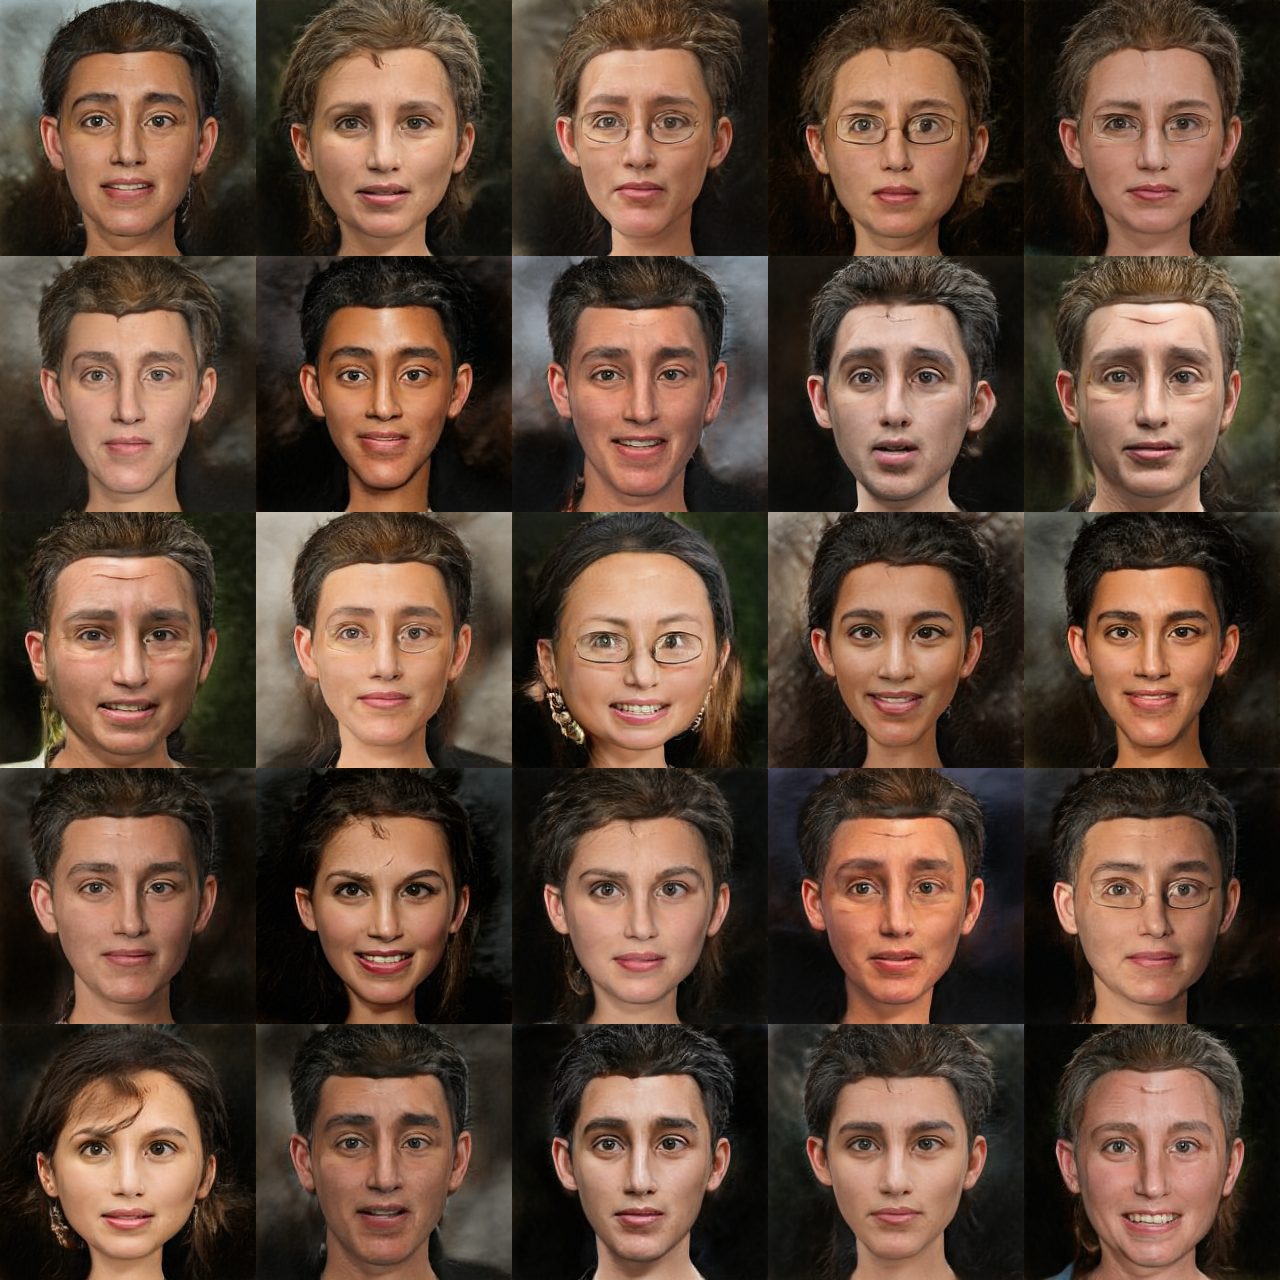

In [ ]:
# generate some random seeds
seeds = np.random.randint(10000000, size=25)
print(seeds)

# show the seeds
imshow(createImageGrid(generate_images_from_seeds(seeds, 0.5), 1 , 5))

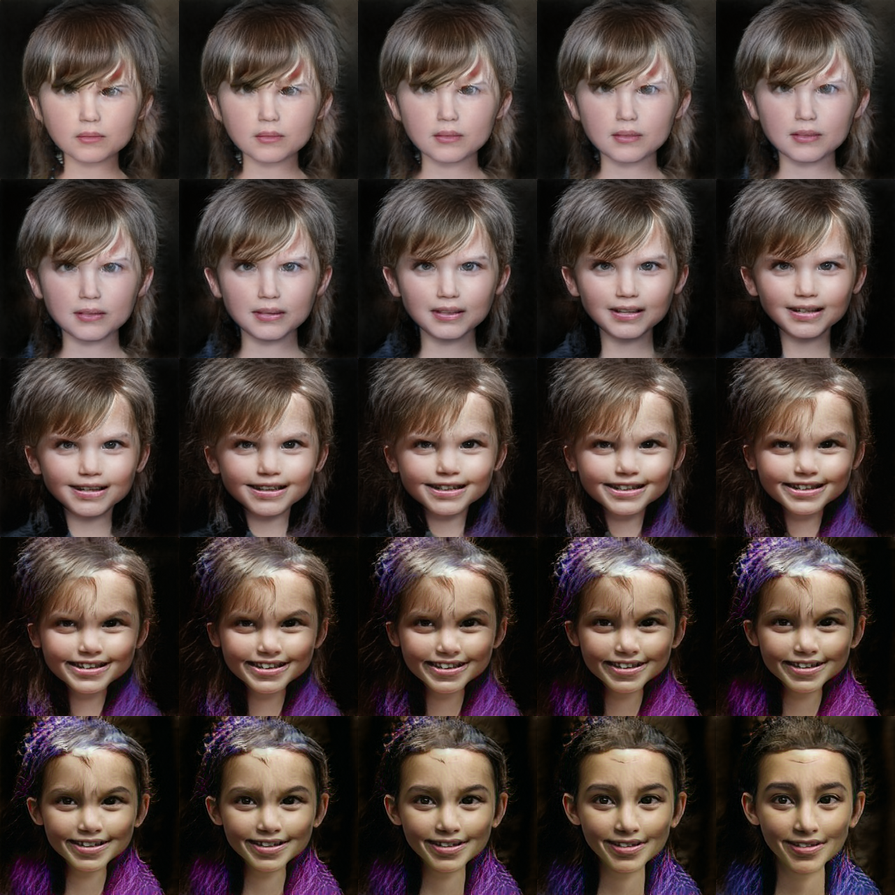

In [ ]:
# Simple (Z) interpolation
zs = generate_zs_from_seeds([401 , 614])

latent1 = zs[0]
latent2 = zs[1]

number_of_steps = 25

imgs = generate_images(interpolate([latent1,latent2],number_of_steps), 1.0)
number_of_images = len(imgs)
imshow(createImageGrid(imgs, 0.7 , 5))

In [ ]:
# generating a MP4 movie

zs = generate_zs_from_seeds([421645,6149575,3487643,3766864 ,3857159,5360657,3720613])

number_of_steps = 20
imgs = generate_images(interpolate(zs,number_of_steps), 0.7)

# Example of reading a generated set of images, and storing as MP4.
%mkdir out
movieName = 'out/mov.mp4'

with imageio.get_writer(movieName, mode='I') as writer:
    for image in log_progress(list(imgs), name = "Creating animation"):
        writer.append_data(np.array(image))
show_video(movieName)